In [1]:
import modelo_susceptibilidad
from wmf import wmf
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
%matplotlib notebook

import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cm import get_cmap
from skimage import io
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

from shapely.geometry import Point
from shapely.wkb import loads
from osgeo import ogr
import json
import sys

from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate,Paragraph, Table, TableStyle
from IPython.display import IFrame
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT, TA_CENTER, TA_RIGHT, TA_JUSTIFY
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table
import sys
import os
from matplotlib.patches import Rectangle

import Func_incendios as Fi

No se logra importar basemap, por lo tanto no funciona Plot_basin
Usando font Avenir


/home/hidrologia/py_env/lib/python3.8/site-packages/modelo_susceptibilidad/msi.py:86: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
path = "/home/hidrologia/jupyter/ModeloSusceptibilidadIncendios/AMVA/SIATA_incendios/"
path_ave = path+'reportes/reporte_horario/Tools/'
cu = wmf.SimuBasin(rute=path_ave+'cuenca_amva_incendios_90m_py3.nc',) #Cargar la cuenca
path_fuente = path_ave+'AvenirLTStd-Book.otf'
path_historial = path+'operacional/Resultados_modelo/'
path_zonas_pronostico = path_ave+'ZonasPronostico_90.tif'
path_zona_urbana = path_ave+'urbano_90m.csv'
path_shape_amva = path_ave+'AreaMetropolitana.shp'
path_icono_incendios = path_ave+'icono1.png'
path_shape_antioquia = path_ave+'Antioquia.shp'
path_departamentos = path_ave+'Departamentos.shp'
path_registro = path+'reportes/registro_incendios/registro.csv'
save_path = path+'reportes/reporte_horario/Municipios/'
path_plantilla = path + 'reportes/reporte_horario/'

In [18]:
Coor_mun = {"Valle" : ([1,2,3,4,5,6,7,8,9,10,11,12], [-75.21, -75.725, 5.975, 6.555]), 
            "Estrella" : ([10],[-75.6, -75.69, 6.1, 6.2]),"Caldas": ([12], [-75.54, -75.7, 5.975, 6.125]), 
            "Envidado" : ([9],[-75.45, -75.62, 6.09, 6.2]), "Sabaneta": ([11],[-75.58, -75.64, 6.1, 6.17]),
            "Itagui" : ([8], [-75.58, -75.65, 6.15, 6.21]), "Medellin" : ([5,6,7],[-75.455, -75.725, 6.15, 6.39]), 
            "Bello" :([4],[-75.5, -75.67, 6.28, 6.44]), "Copacabana" : ([3],[-75.44, -75.56, 6.28, 6.44]), 
            "Girardota" : ([2],[-75.39, -75.5, 6.31, 6.45]), "Barbosa" : ([1],[-75.21, -75.46, 6.35, 6.52])}

In [24]:
rep=pd.read_csv(path_registro)
rep.index = pd.to_datetime(rep.date)

In [53]:
ciclo_anual=rep["id"].resample("M").count()
print(ciclo_anual)
ciclo_anual = ciclo_anual.groupby(ciclo_anual.index.month).mean()

date
2017-07-31     44
2017-08-31     22
2017-09-30      8
2017-10-31      3
2017-11-30      1
2017-12-31     23
2018-01-31      7
2018-02-28     16
2018-03-31     21
2018-04-30      4
2018-05-31      0
2018-06-30     11
2018-07-31     19
2018-08-31     53
2018-09-30     23
2018-10-31      9
2018-11-30      2
2018-12-31     14
2019-01-31     56
2019-02-28     26
2019-03-31      7
2019-04-30      6
2019-05-31     10
2019-06-30     31
2019-07-31     64
2019-08-31    146
2019-09-30     67
2019-10-31     13
2019-11-30      5
2019-12-31     42
2020-01-31     72
2020-02-29     87
2020-03-31     31
2020-04-30     44
2020-05-31     67
2020-06-30     24
2020-07-31     41
2020-08-31     37
2020-09-30     19
2020-10-31     21
2020-11-30     13
2020-12-31     10
2021-01-31     31
2021-02-28     17
2021-03-31      3
Freq: M, Name: id, dtype: int64


In [61]:
rep

,Unnamed: 0,id,lon,lat,hora,fecha,date,foto,camara,tipo,id_municipio,puntos,municipio,fuente
date,,,,,,,,,,,,,,
2017-07-06 15:11:00,1,1,-75.600000,6.140000,15:11,2017-07-06,2017-07-06 15:11:00,incendio-2017-07-06-15-11.jpeg,NaN,i,NaN,POINT (-75.59999999999999 6.14),Sabaneta,S
2017-07-06 17:01:00,2,2,-75.630000,6.220000,17:01,2017-07-06,2017-07-06 17:01:00,incendio-2017-07-06-17-01.jpeg,NaN,i,NaN,POINT (-75.63 6.22),Medellin occidente,S
2017-07-06 17:12:00,3,3,-75.620000,6.230000,17:12,2017-07-06,2017-07-06 17:12:00,incendio-2017-07-06-17-12.jpeg,NaN,i,NaN,POINT (-75.62 6.23),Medellin occidente,S
2017-07-07 14:02:00,4,4,-75.540000,6.230000,14:02,2017-07-07,2017-07-07 14:02:00,incendio-2017-07-07-14-02.jpeg,NaN,i,NaN,POINT (-75.54000000000001 6.23),Medellin zona urbana,S
2017-07-07 16:03:00,5,5,-75.620000,6.230000,16:03,2017-07-07,2017-07-07 16:03:00,incendio-2017-07-07-16-03.jpeg,NaN,i,NaN,POINT (-75.62 6.23),Medellin occidente,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-27 15:50:00,1266,1278,-75.631620,6.253800,15:50,2021-02-27,2021-02-27 15:50:00,incendio-2021-02-27-15-50.jpeg,Celular Samsung,NaN,NaN,POINT (-75.63162 6.2538),Medellin zona urbana,S
2021-02-28 15:29:00,1267,1279,-75.509565,6.311954,15:29,2021-02-28,2021-02-28 15:29:00,incendio-2021-02-28-15-29.jpeg,incendios copacabana,NaN,NaN,POINT (-75.50956499999999 6.311954),Copacabana,S
2021-03-09 14:10:00,1268,1379,-75.524516,6.305408,14:10,2021-03-09,2021-03-09 14:10:00,incendio-2021-03-09-14-10.jpeg,Bello 360,NaN,NaN,POINT (-75.52451600000001 6.305408),Copacabana,S


<IPython.core.display.Javascript object>


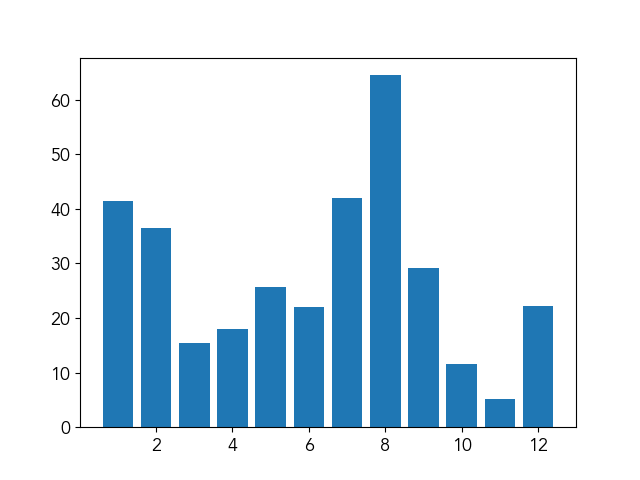

<BarContainer object of 12 artists>

In [39]:
plt.figure()
plt.bar(ciclo_anual.index, ciclo_anual)

In [60]:
df_anual=rep.resample("M", 'municipio').count()

ValueError: No axis named municipio for object type DataFrame

In [62]:
df_anual=rep.groupby(['municipio',rep.index.month]).count()
df_anual

Unnamed: 0  id  lon  lat  hora  fecha  date  foto  camara  \
municipio   date                                                              
Barbosa     7              1   1    1    1     1      1     1     1       1   
            8              3   3    3    3     3      3     3     3       1   
            9              1   1    1    1     1      1     1     1       1   
Bello       1             27  27   27   27    27     27    27    27       6   
            2             20  20   20   20    20     20    20    20       3   
...                      ...  ..  ...  ...   ...    ...   ...   ...     ...   
Santa Elena 8             31  31   31   31    31     31    31    31       5   
            9             14  14   14   14    14     14    14    14       1   
            10             5   5    5    5     5      5     5     5       2   
            11             4   4    4    4     4      4     4     4       3   
            12            11  11   11   11    11     11    11    11       1   

                  tipo  id_municipio  puntos  fuente  
municipio   date                                      
Barbosa     7        0             0       1       1  
            8        2             0       3       3  
            9        0             0       1       1  
Bello       1        7             0      27      27  
            2        4             0      20      20  
...                ...           ...     ...     ...  
Santa Elena 8       25             0      31      31  
            9        2             0      14      14  
            10       1             0       5       5  
            11       0             0       4       4  
            12       5             0      11      11  

[91 rows x 13 columns]

In [65]:
rep[rep["municipio"]=="Barbosa"]

,Unnamed: 0,id,lon,lat,hora,fecha,date,foto,camara,tipo,id_municipio,puntos,municipio,fuente
date,,,,,,,,,,,,,,
2019-08-10 07:59:00,502,501,-75.423707,6.425521,7:59,2019-08-10,2019-08-10 07:59:00,incendio-2019-08-10-07-59.jpeg,NaN,i,NaN,POINT (-75.42370699999999 6.425521),Barbosa,S
2019-08-10 09:02:00,503,502,-75.423683,6.421443,9:02,2019-08-10,2019-08-10 09:02:00,incendio-2019-08-10-09-02.jpeg,NaN,i,NaN,POINT (-75.423683 6.421443),Barbosa,S
2020-07-29 14:20:00,1115,1136,-75.416000,6.420556,14:20,2020-07-29,2020-07-29 14:20:00,incendio-2020-07-29-14-20.jpeg,Parque de las aguas norte,NaN,NaN,POINT (-75.416 6.420556),Barbosa,S
2020-08-02 11:43:00,1120,1141,-75.389350,6.393050,11:43,2020-08-02,2020-08-02 11:43:00,incendio-2020-08-02-11-43.jpeg,Parque de las aguas norte,NaN,NaN,POINT (-75.38934999999999 6.39305),Barbosa,S
2020-09-22 17:10:00,1168,1186,-75.425600,6.416400,17:10,2020-09-22,2020-09-22 17:10:00,incendio-2020-09-22-17-10.jpeg,Parque de las Aguas,NaN,NaN,POINT (-75.4256 6.4164),Barbosa,S


In [5]:
start = (pd.datetime.now() - datetime.timedelta(days = 6)).replace(minute = 0, second = 0)
end = (pd.datetime.now()).replace(minute = 0, second = 0)
end = pd.to_datetime(end)
start = pd.to_datetime(start)

vec = Fi.read_susc(path_historial, start, end)
path_tif = path_zonas_pronostico
mapa_zonas, prop, epsg = wmf.read_map_raster(path_tif) #Leer mapa de regiones
zonas_basin = cu.Transform_Map2Basin(mapa_zonas, prop) #Escribir el mapa en forma de cuenca
zonas_basin[zonas_basin < 0] = 0
model = modelo_susceptibilidad.msi()
mapa_suscep_agre = np.zeros_like(vec)
week = np.zeros([len(vec),12])
urban=pd.read_csv(path_zona_urbana,header=None, dtype=int)[0].values
mapa_final = vec[-1]

mask_urb = mapa_final *np.nan
mask_urb[urban] = 1
mask_urb, prop = cu.Transform_Basin2Map(mask_urb)

<ipython-input-5-2717b13fd288>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start = (pd.datetime.now() - datetime.timedelta(days = 6)).replace(minute = 0, second = 0)
<ipython-input-5-2717b13fd288>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end = (pd.datetime.now()).replace(minute = 0, second = 0)


['2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11']
Usando font Avenir


/home/hidrologia/py_env/lib/python3.8/site-packages/modelo_susceptibilidad/msi.py:86: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [6]:
ind_municipio = np.where(zonas_basin!=10)[0]
mapa_final[ind_municipio] = np.nan

In [7]:
np.nanmax(mapa_final)

0.37800407323960905

<IPython.core.display.Javascript object>


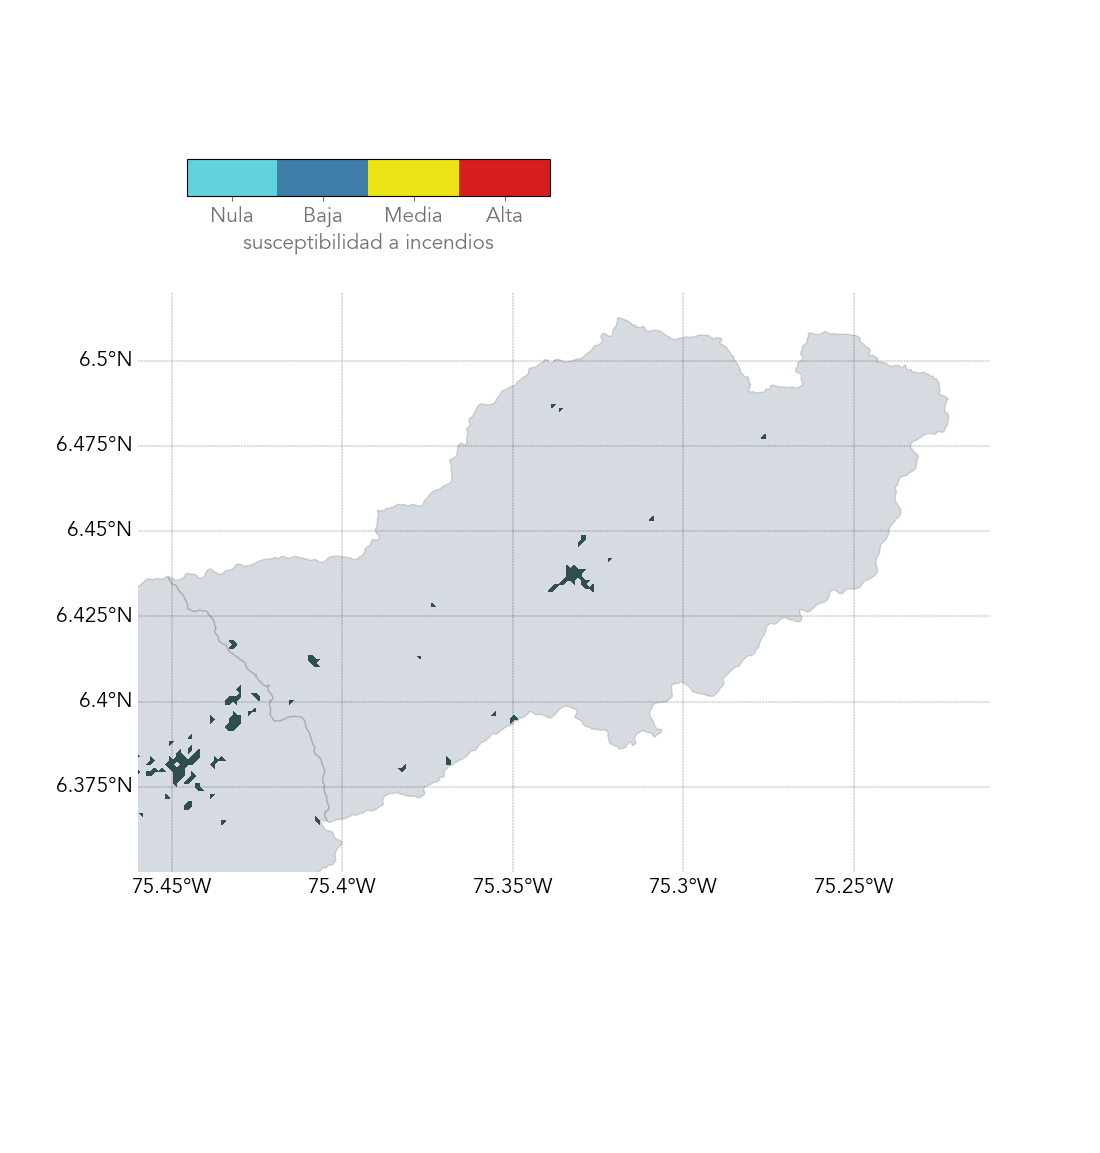

<ipython-input-15-fc26f5949d64>:43: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


In [15]:
import matplotlib as mpl
figsize = 11
fontsize = 15
#text=fecha
fig = plt.figure(figsize=(figsize,figsize*(6.515-5.975)/(75.725-75.21)),facecolor='w',edgecolor='w')

gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree())
ax.set_extent([-75.21, -75.46, 6.35, 6.52])
ax.add_feature(cartopy.feature.BORDERS)

cmap1 = plt.matplotlib.colors.ListedColormap(['darkslategray'])
urban=pd.read_csv(path_zona_urbana,header=None, dtype=int)[0].values
mask_urb = mapa_final *np.nan
mask_urb[urban] = 1
mask_urb, prop = cu.Transform_Basin2Map(mask_urb)
 #[0,0.22,0.42,0.62,87]
#umbs = [0,0.1,0.22,0.38,0.95]
reclass = np.copy(mapa_final)
reclass[np.where((mapa_final >= 0.) & (mapa_final<0.1))[0]] = 1
reclass[np.where((mapa_final >= 0.1) & (mapa_final<0.22))[0]] = 2
reclass[np.where((mapa_final >= 0.22) & (mapa_final<0.38))[0]] = 3
reclass[np.where(mapa_final >= 0.38)[0]] = 4
Map, prop = cu.Transform_Basin2Map(reclass)
Map[(Map==-9999)]=np.nan
mask_urb[(mask_urb==-9999)|(mask_urb==0)]=np.nan
longitudes=np.array([prop[2] + 0.5*float(prop[4]) + float(prop[4])*i for i in range(prop[0])])
latitudes=np.array([prop[3]+0.5*prop[-2]+i*float(prop[-2]) for i in range(prop[1])])
x,y = np.meshgrid(longitudes,latitudes)
rvb =model.colores_modelo
rvb.set_bad('w')

cs = ax.contourf(x,y,Map.T[::-1], cmap = rvb ,zorder = 3,vmax=4, vmin = 1)#,levels=[0,0.22,0.42,0.62,0.87],)
cs1 = ax.contourf(x,y,mask_urb.T[::-1],cmap=cmap1 , zorder =3 )
#Agregamos el grid
gl= ax.gridlines(color="black",linestyle="-.", linewidth = 0.2)
gl.xlabels_bottom=True
gl.ylabels_left=True
gl.xlines=True
gl.ylines=True
gl.xlabel_style = {'size': 15} #Tamaño etiquetas eje X 
gl.ylabel_style = {'size': 15} #Tamaño etiquetas eje Y
ax.outline_patch.set_visible(False)

# Colorbar
cmap = plt.get_cmap(model.colores_modelo,4)
ax4= fig.add_axes((0.17,0.83,0.33,0.032), zorder=5)
ticks= ['Nula','Baja','Media','Alta']
cbar = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                            spacing='proportional',
                            orientation='horizontal')
cbar.set_ticks([0.125,0.375,0.625,0.875])
cbar.set_ticklabels(ticks)
cbar.set_label("susceptibilidad a incendios",fontsize=fontsize,color=(0.45, 0.45, 0.45))
cbar.ax.tick_params(labelsize=fontsize,colors=(0.45, 0.45, 0.45))
geo_reg = shpreader.Reader(path_shape_amva)
shapefile = list(shpreader.Reader(path_shape_amva).geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(),edgecolor='gray',facecolor='lightslategrey', alpha=0.3, linewidth=1)

In [25]:
len(zonas_basin)

79778

In [ ]:


for j in range(len(vec)):
    for i in range(1,13):
        vec[j][mascara] = 0
        pp = np.where(np.array(zonas_basin) == i)[0]
        hist=np.histogram(vec[j][list(set(pp)-set(mascara))],[0,0.22,0.42,0.62,0.87])  # Anterior
        hist=np.histogram(vec[j][list(set(pp)-set(mascara))],[0,0.10,0.22,0.38,0.95])  # Actual
        #hist=np.histogram(vec[j][list(set(pp)-set(mascara))],[0,0.25,0.5,0.75,0.95])  # Ideal
        posmoda=np.where(hist[0]==max(hist[0]))[0]
        moda=[0.14,0.34,0.54,0.73][posmoda[0]]#hist[1][posmoda]  #Anterior
        moda=[0.05,0.14,0.3,0.73][posmoda[0]]#hist[1][posmoda]  #Actual
        #moda=[0.15,0.34,0.65,0.83][posmoda[0]]#hist[1][posmoda]  #Ideal
        mapa_suscep_agre[j][pp] = i
        week[j,i-1] = moda
print(week.T)       
#week[vec.sum(axis = 1) == 0] = np.nan
r = pd.date_range(start, end, freq = 'd')
day_parser = dict(zip([u'Monday',u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday', u'Sunday'],['L', 'M', 'M', 'J', 'V', 'S', 'D']))
days = [str(day_parser[i.day_name()]) + i.strftime('%d') for i in r]
fig = plt.figure(figsize=(19,10))
ax =  fig.add_subplot(111)
rvb =model.colores_modelo
#rvb.set_bad(color='slategray')
zonas = ['Caldas','Sabaneta','La Estrella','Envigado','Itagüí','Medellín Occidente','Medellín Oriente','Medellín Centro','Bello','Copacabana','Girardota','Barbosa']
moda_susc = pd.DataFrame(week.T, columns = days, index =zonas)
#ax.imshow(week.T,cmap=rvb, extent=(0,week.shape[0],0 ,week.shape[1]),vmax=0.87, vmin = 0)
import matplotlib.colors
semana=np.copy(week.T)
semana[semana==0.05] = 1
semana[semana==0.14] = 2
semana[semana==0.3] = 3
semana[semana==0.73] = 4
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#62D2DD","#3F7DAA","#EDE214", "#FF0000"])

#ax.imshow(moda_susc,cmap=rvb, extent=(0,week.shape[0],0 ,week.shape[1]))#,vmax=0.87, vmin = 0)
ax.imshow(semana,cmap=cmap, extent=(0,week.shape[0],0 ,week.shape[1]),vmax=4, vmin = 1)

ax.grid(ls='-',color='k',lw=1, zorder=3)
ax.set_xticks(range(week.shape[0]))
ax.set_yticks(np.array(range(week.shape[1])))
ax.set_yticklabels([])
ax.set_xticklabels(days,ha="left", fontsize = 17)
#ax.set_yticklabels(zonas, fontsize = 17)
# ax.set_xlim(0,week.shape[0])
ax.set_ylim(0,week.shape[1])
ax.set_xlabel('Día de la semana', fontsize = 20)
ax.set_title('Susceptibilidad diaria a\nincendios forestales', fontsize=24)
ax2=fig.add_axes([0.4,.11,.225,.77] )
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
rect = ax2.patch 
rect.set_facecolor('white') 
#rect.set_alpha(0)
print(week.shape[1])
ax2.set_xticks([])
ax2.set_yticks(np.arange(week.shape[1]))
ax2.set_yticklabels(zonas,ha="right", fontsize = 17)
ax2.tick_params(color= "#FF000000", pad=10)
print(zonas)

icono = (io.imread(path_icono_incendios))
if len(duplas) >=1:
    print("mirame que soy mayor que nadaaaaaaaaaaaaaaaaaaaaa")
    fechas_ocurrencia = [i for i in rep[(rep.date<end)&(rep.date>start)].loc[:,'fecha']]
    df_coordenada=pd.DataFrame(duplas, columns= ["longitude", "latitude"])
    df_coordenada["zona"]        = ""

    for index, row in df_coordenada.iterrows():        
        shapefile_zonas = path_ave + "ZonasPronostico.shp"
        puntos    = []
        poligono  = []
        try:
            latitud  = row["latitude"]
            longitud = row["longitude"]
            shp_zonas = searchPointInPolygon(latitud, longitud, shapefile_zonas)
    
        except Exception as e:
            print (e)
            
        zonas = []
        poly_zonas = []        
    #
        if len(shp_zonas) >= 1:
            for u in shp_zonas:
                u = json.loads(u)
                zonas.append(u["properties"]["Zona"])
                poly_zonas.append(u["geometry"]["coordinates"])
    
        df_coordenada.loc[df_coordenada.index == index, "zona"]        = "--".join(zonas)
    
    df_coordenada.index = pd.to_datetime(fechas_ocurrencia)
    df_coordenada["fin"] = [str(day_parser[i.day_name()]) + i.strftime('%d') for i in df_coordenada.index]
    r = pd.date_range(start, end, freq = 'd')
    day_parser = dict(zip([u'Monday',u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday', u'Sunday'],['L', 'M', 'M', 'J', 'V', 'S', 'D']))
    zonas = ['Caldas','Sabaneta','La Estrella','Envigado','Itagüí','Medellín Occidente','Medellín Oriente','Medellín Centro','Bello','Copacabana','Girardota','Barbosa']
    days = [str(day_parser[i.day_name()]) + i.strftime('%d') for i in r]
    dd, zz =np.meshgrid(days,zonas)
    days_r, zonas_r = dd.ravel(), zz.ravel()
    ocurrencia = np.zeros(len(days_r))
    
    for z,d in zip(zonas_r, days_r):
        if z in df_coordenada["zona"].values:
            for j in range(len(df_coordenada)):
                if z == df_coordenada["zona"][j] and d == df_coordenada["fin"][j]:
                    ocurrencia[np.where((zonas_r == df_coordenada["zona"][j]) & (days_r == df_coordenada["fin"][j]))[0]] = 50
    ax2.scatter(days_r, zonas_r, s=ocurrencia, c="purple", marker="X")
    ax2.set_yticks(np.arange(week.shape[1]))
    ax2.set_yticklabels(zonas,ha="right", fontsize = 17)
    for x0, y0 in zip(days_r[ocurrencia>1], zonas_r[ocurrencia>1]):
        im = OffsetImage(icono, zoom=0.7)
        ab = AnnotationBbox(im, (x0,y0), frameon=False)
        ax2.add_artist(ab)
    
plt.savefig(save_path + 'Resumen_semana_%s_%s.png'%(start.strftime('%Y%m%d'), end.strftime('%Y%m%d')),bbox_inches='tight')


In [ ]:
def Plot_Maximo_Mes(mapa_final,fecha,XY=None,n_report=''):
    import matplotlib as mpl
    figsize = 11
    fontsize = 15
    text=fecha
    fig = plt.figure(figsize=(figsize,figsize*(6.515-5.975)/(75.725-75.21)),facecolor='w',edgecolor='w')

    gs = gridspec.GridSpec(1,1)
    ax=fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree())
    ax.set_extent([-75.21, -75.725, 5.975, 6.555])
    ax.add_feature(cartopy.feature.BORDERS)
    
    cmap1 = plt.matplotlib.colors.ListedColormap(['darkslategray'])
    mascara=pd.read_csv(path_zona_urbana,header=None, dtype=int)[0].values
    mask = mapa_final *np.nan
    mask[mascara] = 1
    mask, prop = cu.Transform_Basin2Map(mask)
     #[0,0.22,0.42,0.62,87]
    #umbs = [0,0.1,0.22,0.38,0.95]
    reclass = np.copy(mapa_final)
    reclass[np.where((mapa_final >= 0.) & (mapa_final<0.1))[0]] = 1
    reclass[np.where((mapa_final >= 0.1) & (mapa_final<0.22))[0]] = 2
    reclass[np.where((mapa_final >= 0.22) & (mapa_final<0.38))[0]] = 3
    reclass[np.where(mapa_final >= 0.38)[0]] = 4
    Map, prop = cu.Transform_Basin2Map(reclass)
    Map[(Map==-9999)]=np.nan
    mask[(mask==-9999)|(mask==0)]=np.nan
    longitudes=np.array([prop[2] + 0.5*float(prop[4]) + float(prop[4])*i for i in range(prop[0])])
    latitudes=np.array([prop[3]+0.5*prop[-2]+i*float(prop[-2]) for i in range(prop[1])])
    x,y = np.meshgrid(longitudes,latitudes)
    rvb =model.colores_modelo
    rvb.set_bad('w')
    
    cs = ax.contourf(x,y,Map.T[::-1], cmap = rvb ,zorder = 3,vmax=4, vmin = 1)#,levels=[0,0.22,0.42,0.62,0.87],)
    cs1 = ax.contourf(x,y,mask.T[::-1],cmap=cmap1 , zorder =3 )
    #Agregamos el grid
    gl= ax.gridlines(color="black",linestyle="-.", linewidth = 0.2)
    gl.xlabels_bottom=True
    gl.ylabels_left=True
    gl.xlines=True
    gl.ylines=True
    gl.xlabel_style = {'size': 15} #Tamaño etiquetas eje X 
    gl.ylabel_style = {'size': 15} #Tamaño etiquetas eje Y
    ax.outline_patch.set_visible(False)
    
    # Colorbar
    cmap = plt.get_cmap(model.colores_modelo,4)
    ax4= fig.add_axes((0.17,0.83,0.33,0.032), zorder=5)
    ticks= ['Nula','Baja','Media','Alta']
    cbar = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                                spacing='proportional',
                                orientation='horizontal')
    cbar.set_ticks([0.125,0.375,0.625,0.875])
    cbar.set_ticklabels(ticks)
    cbar.set_label("susceptibilidad a incendios",fontsize=fontsize,color=(0.45, 0.45, 0.45))
    cbar.ax.tick_params(labelsize=fontsize,colors=(0.45, 0.45, 0.45))
    geo_reg = shpreader.Reader(path_shape_amva)
    shapefile = list(shpreader.Reader(path_shape_amva).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(),edgecolor='gray',facecolor='lightslategrey', alpha=0.3, linewidth=1)

    # Ubicar incendio si ocurrio (XY en los argumentos)
    n_report = 0
    if XY != None:
        for xx in range(len(duplas)):
            Xcc, Ycc = duplas[xx][0],duplas[xx][1]
            icono = (io.imread(path_icono_incendios))
            n_report+=1
            im = OffsetImage(icono, zoom=0.6)
            ab = AnnotationBbox(im, (Xcc,Ycc), frameon=False)
            ax.add_artist(ab)

    plt.text(1.55,-14,'Incendios y columnas\nde humo reportadas\n%s\nTotal:%s'%(text.split('Semana')[1],n_report), ha='center',va='center', fontsize=18,color='k',zorder=4) 
    im = OffsetImage(icono, zoom=1.5)
    ac = AnnotationBbox(im, (-75.35,6.25), frameon=False)
    ax.add_artist(ac)

    ## Colombia
    ax2=fig.add_axes([0.43,.15,.3,.17],projection=ccrs.PlateCarree())
    ax2.set_extent([-65, -81.8, -5., 13])
    ax2.coastlines()
    ax2.add_feature(cartopy.feature.OCEAN)
    ax2.add_feature(cartopy.feature.BORDERS)
    shapefile = list(shpreader.Reader(path_shape_antioquia).geometries())
    ax2.add_geometries(shapefile, ccrs.PlateCarree(),edgecolor='gray',facecolor="green", alpha=0.3, linewidth=1)
    
    ## Antioquia
    ax3=fig.add_axes([0.63,.15,.3,.17],projection=ccrs.PlateCarree())
    ax3.set_extent([-73.76, -77.18, 5.35, 8.9])
    ax3.coastlines()
    ax3.add_feature(cartopy.feature.OCEAN)
    ax3.add_feature(cartopy.feature.BORDERS)
    shapefile = list(shpreader.Reader(path_shape_antioquia).geometries())
    ax3.add_geometries(shapefile, ccrs.PlateCarree(),edgecolor='gray',facecolor='green', alpha=0.4, linewidth=1)
    shapefile = list(shpreader.Reader(path_shape_amva).geometries())
    ax3.add_geometries(shapefile, ccrs.PlateCarree(),edgecolor='gray',facecolor='lightslategrey', alpha=0.4, linewidth=1, zorder=4)
    shapefile = list(shpreader.Reader(path_departamentos).geometries())
    ax3.add_geometries(shapefile, ccrs.PlateCarree(),edgecolor='gray',facecolor='white', alpha=0.3, linewidth=1)

    plt.savefig(save_path + 'Mapa_semana_%s_%s.png'%(start.strftime('%Y%m%d'), end.strftime('%Y%m%d')),dpi=100,bbox_inches='tight')

In [ ]:
def report(start, end):
    barcode_font = path_ave+'AvenirLTStd-Book.ttf'
    pdfmetrics.registerFont(TTFont("AvenirBook", barcode_font))

    widthPage =  1157
    heightPage = 1159
    pdf = canvas.Canvas(save_path + 'Reporte_incendios5_%s_%s.pdf'%(start.strftime('%Y%m%d'), end.strftime('%Y%m%d')),pagesize=(widthPage,heightPage))

    pdf.drawImage(path_plantilla + 'PlantillaReporte2.png',0,0,width=widthPage,height=heightPage)
    pdf.drawImage(save_path + 'Resumen_semana_%s_%s.png'%(start.strftime('%Y%m%d'), end.strftime('%Y%m%d')),660,60 ,width=420,preserveAspectRatio=True)
    pdf.drawImage(save_path + 'Mapa_semana_%s_%s.png'%(start.strftime('%Y%m%d'), end.strftime('%Y%m%d')),30,85 ,width=600,preserveAspectRatio=True)
    print(save_path + 'Mapa_semana_%s_%s.png'%(start.strftime('%Y%m%d'), end.strftime('%Y%m%d')))
    text_color = '#%02x%02x%02x' % (8,31,45)
    styles=getSampleStyleSheet()
    styles.add(ParagraphStyle(name='Justify',\
                              alignment=TA_JUSTIFY,\
                              fontName = "AvenirBook",\
                              fontSize = 26,\
                              textColor = text_color,\
                              leading = 20))
    
    p = Paragraph(end.strftime('Mapa de %Y-%m-%d %H:00:00'), styles["Justify"])
    p.wrapOn(pdf, 720, 200)
    p.drawOn(pdf,320,920)
    
    pdf.showPage()

    pdf.save()